In [32]:
import pandas as pd
import plotly.graph_objects as go

2 fuentes:
- Plazos fijos: https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas2023.xls
- CER: https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/cer2023.xls

In [43]:
def read_pf_trad_bcos(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas{anio}.xls", sheet_name="Estra_dia_bancos", header=25)
    df = df.dropna(subset="fecha")
    df["fecha"] = df["fecha"].astype(int)
    df = df.set_index("fecha")
    df = df[["pasdes18","pasdes20","pasdes22","pasdes24"]] / 1_000 #Está en miles, lo paso a millones de pesos
    df = df.rename({"pasdes18":"pf_trad_99.000", "pasdes20":"pf_trad_100.000 a 499.999",
                                    "pasdes22":"pf_trad_500.000 a 999.999", "pasdes24":"pf_trad_1.000.000+"},axis=1)
    return df

pf_trad_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_pf_trad_bcos(anio=anio)
    pf_trad_df.append(temp)
pf_trad_df = pd.concat(pf_trad_df)
pf_trad_df

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+
fecha,,,,
20200102,3271.352,15352.223,10462.915,76408.098
20200103,3397.743,16271.182,11528.363,51287.046
20200106,2816.056,13176.455,9026.834,48506.163
20200107,1613.064,7278.187,4715.954,24213.779
20200108,2854.890,14360.960,10075.839,58416.095
...,...,...,...,...
20240110,2043.210,25501.812,40475.387,756529.459
20231227,1765.107,22473.963,37629.808,928631.816
20231228,1007.601,12609.965,19226.983,647953.854


In [34]:
def read_pf_uva(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas{anio}.xls", sheet_name="UVA_UVI", header=25, index_col="fecha")
    df = df[["pasvar01","pasvar04","pasvar07","pasvar10"]] / 1_000 #Está en miles, lo paso a millones de pesos
    df = df.rename({"pasvar01":"pf_uva_99.000", "pasvar04":"pf_uva_100.000 a 499.999",
                                    "pasvar07":"pf_uva_500.000 a 999.999", "pasvar10":"pf_uva_1.000.000+"},axis=1)
    return df

pf_uva_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_pf_uva(anio=anio)
    pf_uva_df.append(temp)
pf_uva_df = pd.concat(pf_uva_df)
pf_uva_df

,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+
fecha,,,,
20200102,21.202,51.253,35.153,786.613
20200103,15.057,39.073,21.533,187.447
20200106,19.082,47.981,25.533,2007.373
20200107,14.209,31.178,17.425,191.170
20200108,15.062,40.351,23.439,404.594
...,...,...,...,...
20240104,11.114,144.986,227.595,2549.255
20240105,11.068,167.707,244.561,1829.812
20240108,16.494,202.936,275.519,2664.425


In [35]:
def read_cer(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/cer{anio}.xls", header=25, index_col="fecha")
    df = df[["coef001"]]
    df = df.rename({"coef001":"cer"},axis=1)
    return df

cer_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_cer(anio=anio)
    cer_df.append(temp)
cer_df = pd.concat(cer_df)
cer_df = cer_df.drop_duplicates()
cer_df

,cer
fecha,
20200101,18.726329
20200102,18.751778
20200103,18.777262
20200104,18.802781
20200105,18.828335
...,...
20240211,238.913713
20240212,240.670652
20240213,242.440511


In [36]:
df = pf_trad_df.merge(right=pf_uva_df, left_index=True, right_index=True, how="left")
df = df.merge(right=cer_df, left_index=True, right_index=True, how="left")
df.index = pd.to_datetime(df.index, format="%Y%m%d")
df['pf_uva_total'] = df.filter(like='uva').sum(axis=1)
df['pf_trad_total'] = df.filter(like='trad').sum(axis=1)
df

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,cer,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,,
2020-01-02,3271.352,15352.223,10462.915,76408.098,21.202,51.253,35.153,786.613,18.751778,894.221,105494.588
2020-01-03,3397.743,16271.182,11528.363,51287.046,15.057,39.073,21.533,187.447,18.777262,263.110,82484.334
2020-01-06,2816.056,13176.455,9026.834,48506.163,19.082,47.981,25.533,2007.373,18.853923,2099.969,73525.508
2020-01-07,1613.064,7278.187,4715.954,24213.779,14.209,31.178,17.425,191.170,18.879546,253.982,37820.984
2020-01-08,2854.890,14360.960,10075.839,58416.095,15.062,40.351,23.439,404.594,18.905203,483.446,85707.784
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04,1017.355,14116.599,21401.528,431604.800,11.114,144.986,227.595,2549.255,187.829707,2932.950,468140.282
2024-01-05,1035.271,14101.955,19298.279,297027.826,11.068,167.707,244.561,1829.812,188.560913,2253.148,331463.331
2024-01-08,1964.233,24893.102,35990.480,513295.786,16.494,202.936,275.519,2664.425,190.771653,3159.374,576143.601


In [37]:
df_ajustado = df.copy()
last_cer = df.cer.iloc[-1]
df_ajustado = df_ajustado.div(df["cer"],axis=0).mul(last_cer).drop("cer",axis=1)
df_ajustado.head()

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,
2020-01-02,33540.802113,157404.606303,107275.084290,783403.588135,217.381708,525.491213,360.419734,8065.054134,9168.346789,1.081624e+06
2020-01-03,34789.395082,166600.175191,118038.584748,525126.622554,154.168200,400.067349,220.475782,1919.264565,2693.975895,8.445548e+05
2020-01-06,28716.280616,134364.792212,92049.695821,494633.838350,194.585643,489.278573,260.368683,20469.865077,21414.097975,7.497646e+05
2020-01-07,16426.637908,74117.420310,48024.919500,246581.028414,144.697357,317.501176,177.447495,1946.779774,2586.425802,3.851500e+05
2020-01-08,29033.316485,146046.361402,102468.053948,594072.967410,153.175714,410.356740,238.367119,4114.591333,4916.490905,8.716207e+05


<Axes: xlabel='fecha'>

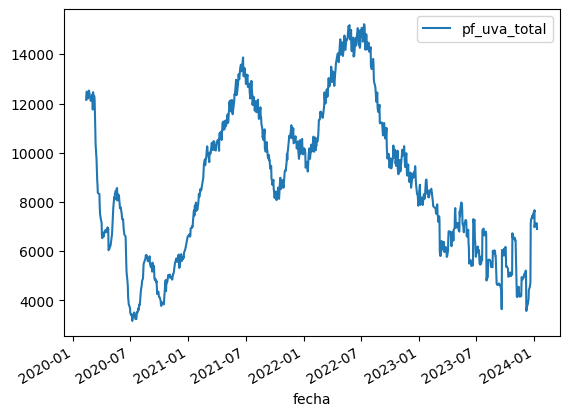

In [49]:
df_ajustado.rolling(window=30).mean()[["pf_uva_total"]].plot()

In [38]:
df_ajustado_mensual = df_ajustado.copy()
df_ajustado_mensual = df_ajustado_mensual.resample('M').sum()
df_ajustado_mensual.index = df_ajustado_mensual.index.month_name(locale='es_ES.utf8').str.lower().str[:3] + "-" + df_ajustado_mensual.index.year.astype(str).str[2:]
df_ajustado_mensual.head()

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,
ene-20,452398.364792,2.202762e+06,1.540387e+06,8.304553e+06,4712.152627,13850.314878,7927.185922,239775.661805,266265.315232,1.250010e+07
feb-20,372664.248559,1.936819e+06,1.376533e+06,7.963518e+06,6399.805436,22596.793182,14342.592377,138054.539993,181393.730988,1.164953e+07
mar-20,339006.215132,1.773715e+06,1.276832e+06,7.481850e+06,4172.333444,12699.003884,7625.078683,100127.377333,124623.793344,1.087140e+07
abr-20,344249.369508,1.885172e+06,1.464977e+06,8.420348e+06,5573.940702,18834.773524,12429.406088,109681.870613,146519.990926,1.211475e+07
may-20,331892.094477,1.776460e+06,1.357431e+06,8.833211e+06,6035.552661,22302.991212,14421.931377,109149.275135,151909.750386,1.229899e+07


In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]/df_ajustado_mensual["pf_trad_total"].iloc[0] * 100, name = "PF tradicional"))
fig.add_trace(go.Scatter(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]/df_ajustado_mensual["pf_uva_total"].iloc[0] * 100, name = "PF UVA"))

fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = "Evolución comparada plazos fijos tradicionales vs UVA<br><sup> Ajustados por CER",
                  height = 600, width = 700, legend_orientation = "h", legend_y = 1.08)
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x = "jul-22", line_dash = "dash", line_width=.8)
fig.add_annotation(text="Renuncia Guzmán", x="jul-22",showarrow=False, y =170)
fig.add_vline(x="ago-23", line_dash = "dash", line_width = .8)
fig.add_annotation(text="Hiperlicuación", x="nov-23",showarrow=False, y =175)
fig.add_hline(y=100, line_dash = "dash",line_width = .8, annotation_text = "Base Enero 2020 = 100", annotation_position = "top left")
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [40]:
fig = go.Figure()
# fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]))
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]))
ultimo_dato = df_ajustado_mensual["pf_trad_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = f"Plazos fijos tradicional en millones de pesos ajustados por CER<br><sup>Último dato a {ultimo_mes}",
                  height = 600, width = 700, )
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x="ago-23", line_dash = "dash", line_width=.7)
fig.add_annotation(text = f"<b>{format(int(ultimo_dato), ',').replace(',', '.')}", x = ultimo_mes, y = ultimo_dato,ax=25,ay=-25)
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [41]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]))
# fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]))
ultimo_dato = df_ajustado_mensual["pf_uva_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = f"Plazos fijos UVA en millones de pesos ajustados por CER<br><sup>Último dato a {ultimo_mes}",
                  height = 600, width = 700, )
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x="ago-23", line_dash = "dash", line_width=.7)
fig.add_annotation(text = format(int(ultimo_dato), ',').replace(',', '.'), x = ultimo_mes, y = ultimo_dato,ax=0,ay=-25)
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [42]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"], yaxis='y1',offsetgroup=1, name="PF tradicional (izq)"))
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"], yaxis='y2',offsetgroup=2, name = "PF UVA (der)"))
ultimo_dato = df_ajustado_mensual["pf_uva_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(
  template = None, legend_orientation = "h", legend_y=1.05, separators = ",.",
  height = 600, width = 1_000, font_family="georgia",
  title_text = f"Evolución Plazos fijos (UVA vs tradicional) ajustado por CER a precios de hoy<br><sup>En millones de pesos. Último dato a {ultimo_mes}",
  yaxis2=dict(
      overlaying='y',
      side='right',
      tickformat = ","
  )
)
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x = "jul-22", line_dash = "dash", line_width=.8)
fig.add_annotation(text="<b>Renuncia Guzmán", x="jul-22",showarrow=False, y = 21_000_000)
fig.add_vline(x="nov-23", line_dash = "dash", line_width = .8)
fig.add_annotation(text="<b>Hiperlicuación", x="nov-23",showarrow=False, y =21_000_000)
fig.add_annotation(text = "Fuente BCRA", xref="paper",yref="paper", x=0, y=-.1, showarrow=False)